<a href="https://colab.research.google.com/github/Shrenik811rp/basic_python_projects/blob/master/basic_python_projects/ML_PROJECTS/DEEP_LEARNING/NEURAL_NET_PROOJECTS/NEURAL_STYLE_TRANSFER/Neural_Style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import tensorflow_hub as hub 
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [10]:
#load model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [11]:

#give image path
def load_image(img_path):
  #read image file
  img = tf.io.read_file(img_path)
  # passing image
  img = tf.image.decode_image(img,channels=3)

  #formatting image
  img = tf.image.convert_image_dtype(img,tf.float32)

  #image is in an array
  img = img[tf.newaxis,:]
  return img


In [38]:

#content_img is the main image
content_image = load_image('/content/Koala.jpg')

#style image is the image we overlap
style_image = load_image('/content/painting2.jpg')



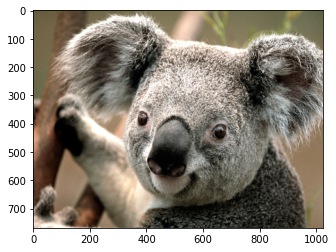

In [39]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [40]:
content_image.shape

TensorShape([1, 768, 1024, 3])

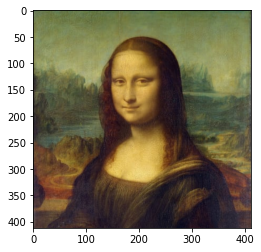

In [41]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [42]:
combined_image = model(tf.constant(content_image), tf.constant(style_image))[0]

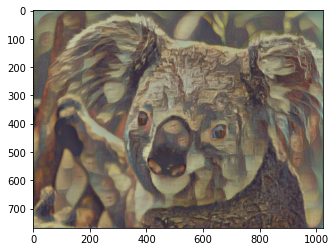

In [43]:
plt.imshow(np.squeeze(combined_image))
plt.show()

In [44]:

cv2.imwrite('combined_img.jpg', cv2.cvtColor(np.squeeze(combined_image)*255, cv2.COLOR_BGR2RGB))

True